# FRONT MODELS

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np

import random 

import matplotlib.pyplot as plt
from matplotlib import colors
import mplcursors
import matplotlib.colors as mcolors

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
# DATABES SQLITE
import sqlite3
from sqlalchemy import create_engine, Column, Integer, String, MetaData, Table, update, select
db_path = '../DATA/HistoPlotik.db'

In [4]:

# Connect to the SQLite database (replace 'your_database.db' with your actual database file)
connection = sqlite3.connect(db_path)

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", connection)
for table in tables['name']:
    print (table)

# Close the database connection
connection.close()

XGBoost_reg200_resultats_tbl
XGBoost_reg200_importance_tbl
y_resultats200_tbl
X_col_titr
data_tbl
LGB_reg200_importance_tbl
LGB_reg200_resultats_tbl
villes_tbl
RandomF_reg200_resultats_tbl_OLD
RandomF_reg200_importance_tbl_OLD
RandomF_reg200_resultats_tbl
RandomF_reg200_importance_tbl


## Resultats

In [5]:
def import_result_col (db_path, tbl_value, col_value) :
    connection = sqlite3.connect(db_path)

    # Create a cursor object to execute SQL queries
    cursor = connection.cursor()

    # Define the SQL query for the join
    # Use string formatting to insert variable values into the query
    sql_query = f"""
    SELECT 
     {col_value}
    FROM     
     {tbl_value} 
    """
    # Execute the SQL query and fetch the result into a DataFrame
    return pd.read_sql_query(sql_query, connection)


In [6]:
result = import_result_col (db_path, 'y_resultats200_tbl', '*') 
result.shape

(23946, 8)

In [7]:
predict = import_result_col (db_path, 'LGB_reg200_resultats_tbl', '*') 
predict.shape

(23946, 8)

In [8]:
total_voix = {
    'NUP': 6154534,
    'ECO': 616832,
    'ENS': 6005377,
    'LR_UDI': 2836040,
    'EXTREMD': 5296096,
    'CENTRE': 1426783,
    'OTR': 645884
}

total_voix_sum = sum(total_voix.values())
print(f'Total Voix Sum: {total_voix_sum}')

# Calculate the mean score for each party
score_mean = ['key']
for party, voix in total_voix.items():
    mean_score = voix / total_voix_sum
    score_mean.append(mean_score)
    print(f'Mean Score for {party}: {mean_score*100}')
score_mean


Total Voix Sum: 22981546
Mean Score for NUP: 26.780330618314363
Mean Score for ECO: 2.684031787939767
Mean Score for ENS: 26.13130117529952
Mean Score for LR_UDI: 12.340510077085327
Mean Score for EXTREMD: 23.044994449024447
Mean Score for CENTRE: 6.208385632541867
Mean Score for OTR: 2.810446259794707


['key',
 0.26780330618314363,
 0.026840317879397668,
 0.2613130117529952,
 0.12340510077085327,
 0.23044994449024447,
 0.062083856325418664,
 0.028104462597947067]

In [9]:
titr_part=list(total_voix.keys())
titr_part

['NUP', 'ECO', 'ENS', 'LR_UDI', 'EXTREMD', 'CENTRE', 'OTR']

In [25]:
def perf_model (db_path, result_tbl, model_tbl, score_mean) :
    
    result = import_result_col (db_path, result_tbl, '*')
    predict = import_result_col (db_path, model_tbl, '*') 
  
    if result.shape == predict.shape:
        mse0_list = []
        mse_list = []
        for i, col in enumerate(result.columns):
            if col != 'key' :
                moy_value = score_mean[i]
                # Assuming the columns have the same names
                real_values = result.iloc[:, i]
                predicted_values = predict.iloc[:, i].values
                # Calculate Mean Squared Error (MSE)
                mse0 = mean_squared_error(real_values, np.full_like(real_values, moy_value))
                mse0_list.append(mse0)
                mse = mean_squared_error(real_values, predicted_values)
                mse_list.append(mse)
                print(f'Mean Squared Error for column {col} for {model_tbl}: {format(mse, ".3e")} --- MSE MOYENNE {format(mse0, ".3e")} => RAPPORT : {mse0/mse:.2f}')
        dico_perf_moy = {'mse_moy': np.mean(mse0_list), model_tbl[0:-14]: np.mean(mse_list)}
        print(f'Mean Squared Error : {format(np.mean(mse_list), ".3e")} / {format(np.mean(mse0_list), ".3e")}')
        return {'mse_moy': mse0_list, model_tbl[0:-14]: mse_list} , dico_perf_moy 
    else:
        print("Shapes of result and predict dataframes are not the same.")
        return {'mse_moy': None, model_tbl[0:-4]: None} , {'moy_mse_moy': None, 'moy_'+model_tbl[0:-14]: None}


In [11]:

def mse_model(db_path, result_tbl, model_tbl):
    result = import_result_col(db_path, result_tbl, '*')
    predict = import_result_col(db_path, model_tbl, '*') 
  
    if result.shape == predict.shape:
        mse_dico = {}
        for i, col in enumerate(result.columns):
            if col != 'key' :
                # Assuming the columns have the same names
                real_values = result.iloc[:, i]
                predicted_values = predict.iloc[:, i]
                print (real_values.shape)
                
                # Calculer le MSE pour chaque ligne
                mse_line_by_line = [mean_squared_error(real_values, predicted_values) for real, pred in zip(real_values, predicted_values)]
                
                # Ajouter la liste de MSE à mse_dico
                mse_dico[col] = mse_line_by_line
    else:
        print("Shapes of result and predict dataframes are not the same.")
    
    return mse_dico

# Exemple d'utilisation
result_tbl = 'y_resultats200_tbl'
model_tbl = 'LGB_reg200_resultats_tbl'
mse_dico = mse_model(db_path, result_tbl, model_tbl)

# Afficher les MSE pour chaque colonne
for col, mse_list in mse_dico.items():
    print(f"{col}: {mse_list}")
        
        

(23946,)
(23946,)
(23946,)
(23946,)
(23946,)
(23946,)
(23946,)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:
def mse_model(db_path, result_tbl, model_tbl, sample_size=5000):
    result = import_result_col(db_path, result_tbl, '*')
    predict = import_result_col(db_path, model_tbl, '*') 

    # Échantillon aléatoire de 5000 indices parmi les lignes disponibles
    sample_indices = np.random.choice(result.index, size=sample_size, replace=False)
    
    # Sélectionner l'échantillon à partir du DataFrame d'origine
    result_sample = result.loc[sample_indices]
    predict_sample = predict.loc[sample_indices]

    if result_sample.shape == predict_sample.shape:
        mse_dico = {}
        for i, col in enumerate(result_sample.columns):
            if col != 'key' :
                # Assuming the columns have the same names
                real_values = result_sample.iloc[:, i]
                predicted_values = predict_sample.iloc[:, i]

                # Calculer le MSE pour chaque ligne
                mse_line_by_line = [mean_squared_error(real_values, predicted_values) for real, pred in zip(real_values, predicted_values)]

                # Ajouter la liste de MSE à mse_dico
                mse_dico[col] = mse_line_by_line
    else:
        print("Shapes of result and predict dataframes are not the same.")
    
    return mse_dico

# Exemple d'utilisation avec échantillon de 5000 lignes
result_tbl = 'y_resultats200_tbl'
model_tbl = 'LGB_reg200_resultats_tbl'
mse_list_sample = mse_model(db_path, result_tbl, model_tbl, sample_size=10)


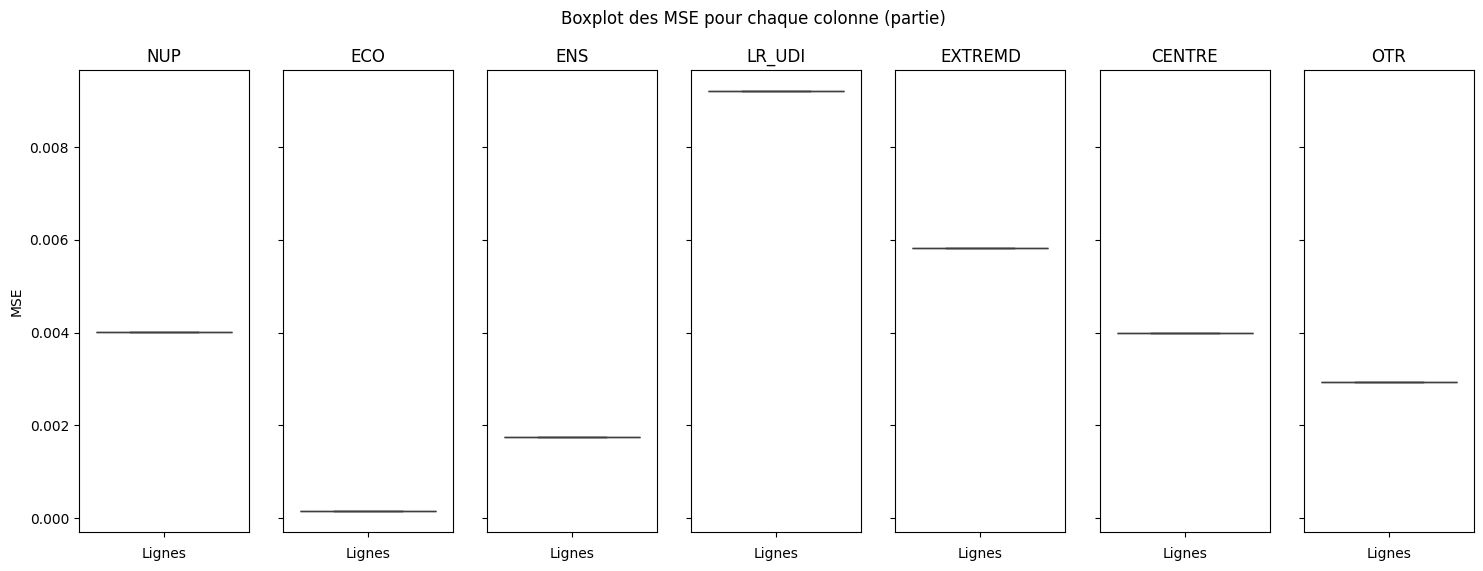

In [14]:
import seaborn as sns
# Créer 7 graphiques de boxplot (un pour chaque colonne)
fig, axes = plt.subplots(1, 7, figsize=(18, 6), sharey=True)
fig.suptitle('Boxplot des MSE pour chaque colonne (partie)')

for i, (col, mse_list) in enumerate(mse_list_sample.items()):
    sns.boxplot(data=mse_list, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Lignes')
    if i == 0:
        axes[i].set_ylabel('MSE')

plt.show()

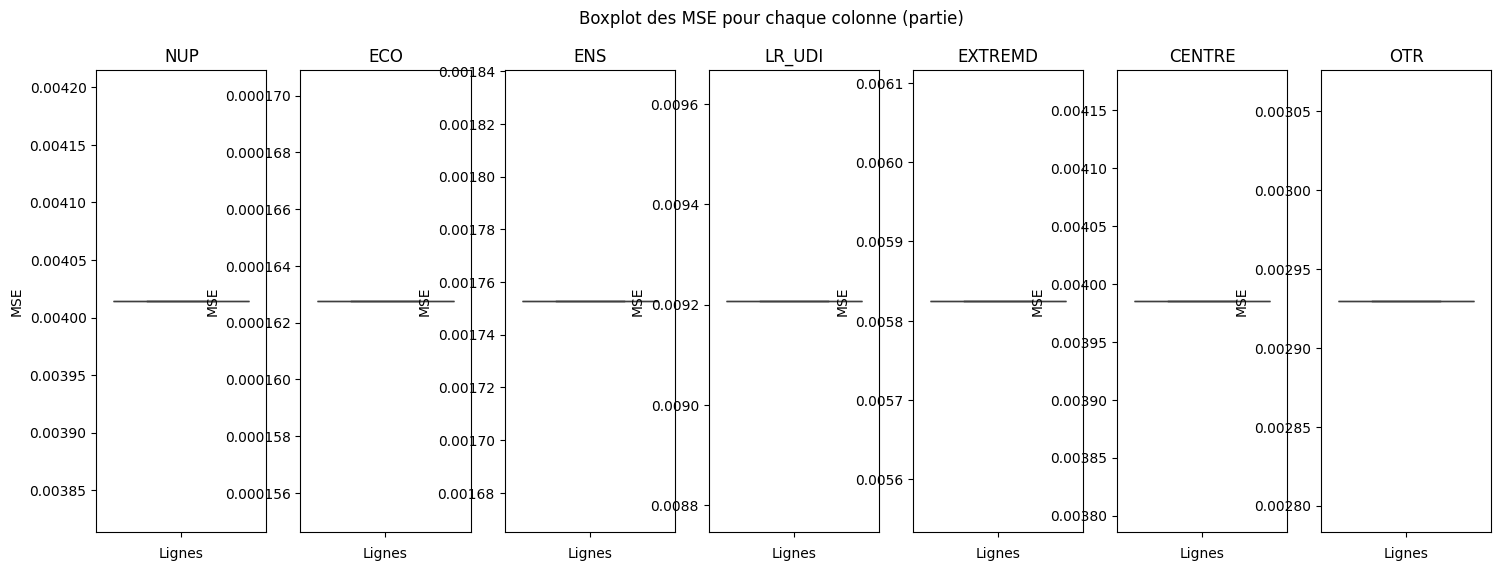

In [15]:
fig, axes = plt.subplots(1, 7, figsize=(18, 6), sharey=False)
fig.suptitle('Boxplot des MSE pour chaque colonne (partie)')

for i, (col, mse_list) in enumerate(mse_list_sample.items()):
    sns.boxplot(data=mse_list, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Lignes')
    axes[i].set_ylabel('MSE')
    axes[i].set_ylim([min(mse_list), max(mse_list)])  # Ajuster les limites y ici

plt.show()

In [16]:
def mse_model (db_path, result_tbl, model_tbl) :
    
    result = import_result_col (db_path, result_tbl, '*')
    predict = import_result_col (db_path, model_tbl, '*') 
  
    if result.shape == predict.shape:
        mse_list = []
        for i, col in enumerate(result.columns):
            if col != 'key' :
                # Assuming the columns have the same names
                real_values = result.iloc[:, i]
                predicted_values = predict.iloc[:, i].values
                mse = mean_squared_error(real_values, predicted_values)
                mse_list.append(mse)
                print (col, mse, min(mse_list), max(mse_list))
    else:
        print("Shapes of result and predict dataframes are not the same.")

result_tbl = 'y_resultats200_tbl'
model_tbl = 'LGB_reg200_resultats_tbl'
mse_model  (db_path, result_tbl , model_tbl)
        
        

NUP 0.0033958852315906503 0.0033958852315906503 0.0033958852315906503
ECO 0.0002443474564698635 0.0002443474564698635 0.0033958852315906503
ENS 0.004143222765996065 0.0002443474564698635 0.004143222765996065
LR_UDI 0.006946201984190602 0.0002443474564698635 0.006946201984190602
EXTREMD 0.0028293664323298167 0.0002443474564698635 0.006946201984190602
CENTRE 0.004622804941894148 0.0002443474564698635 0.006946201984190602
OTR 0.00047806641343941587 0.0002443474564698635 0.006946201984190602


7
MSE pour chaque colonne (à l'exception de 'key'):
NUP: [0.00339589]
ECO: [0.00024435]
ENS: [0.00414322]
LR_UDI: [0.0069462]
EXTREMD: [0.00282937]
CENTRE: [0.0046228]
OTR: [0.00047807]


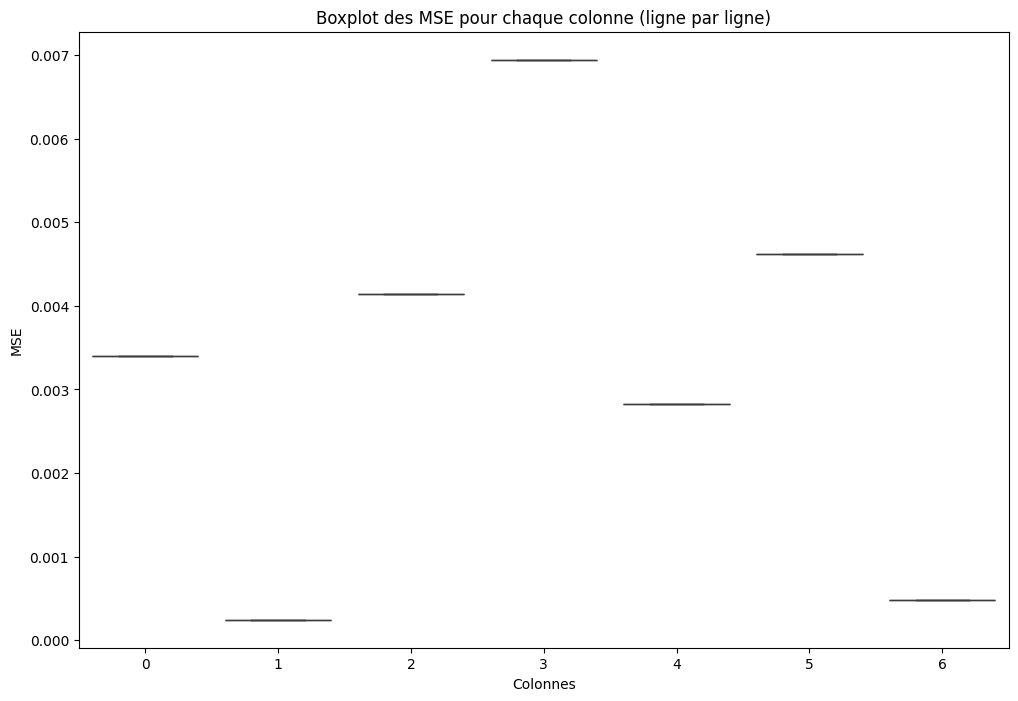

In [18]:
import seaborn as sns

def mse_model(db_path, result_tbl, model_tbl):
    result = import_result_col(db_path, result_tbl, '*')
    predict = import_result_col(db_path, model_tbl, '*')

    if result.shape == predict.shape:
        mse_list = []
        for i, col in enumerate(result.columns):
            if col != 'key':
                # Assuming the columns have the same names
                real_values = result.iloc[:, i]
                predicted_values = predict.iloc[:, i]
                
                # Calculer le MSE ligne par ligne
                mse_line_by_line = mean_squared_error(real_values, predicted_values, multioutput='raw_values')
                
                # Ajouter la liste de MSE à mse_list
                mse_list.append(mse_line_by_line)

        print (len(mse_list))
        return mse_list
    else:
        print("Shapes of result and predict dataframes are not the same.")

result_tbl = 'y_resultats200_tbl'
model_tbl = 'LGB_reg200_resultats_tbl'
mse_list = mse_model(db_path, result_tbl, model_tbl)

# Afficher les MSE pour chaque colonne (ligne par ligne)
print("MSE pour chaque colonne (à l'exception de 'key'):")
for col, mse_line_by_line in zip(result.columns[1:], mse_list):
    print(f"{col}: {mse_line_by_line}")

# Tracer le boxplot pour les MSE ligne par ligne
plt.figure(figsize=(12, 8))
sns.boxplot(data=mse_list)
plt.title('Boxplot des MSE pour chaque colonne (ligne par ligne)')
plt.xlabel('Colonnes')
plt.ylabel('MSE')
plt.show()

In [19]:
result_tbl = 'y_resultats200_tbl'
model_tbl = 'LGB_reg200_resultats_tbl'
dico_perf , dico_perf_moy = perf_model (db_path, result_tbl , model_tbl , score_mean)

Mean Squared Error for column NUP for LGB_reg200_resultats_tbl: 3.396e-03 --- MSE MOYENNE 1.105e-02 => RAPPORT : 3.25
Mean Squared Error for column ECO for LGB_reg200_resultats_tbl: 2.443e-04 --- MSE MOYENNE 4.577e-04 => RAPPORT : 1.87
Mean Squared Error for column ENS for LGB_reg200_resultats_tbl: 4.143e-03 --- MSE MOYENNE 1.037e-02 => RAPPORT : 2.50
Mean Squared Error for column LR_UDI for LGB_reg200_resultats_tbl: 6.946e-03 --- MSE MOYENNE 1.504e-02 => RAPPORT : 2.16
Mean Squared Error for column EXTREMD for LGB_reg200_resultats_tbl: 2.829e-03 --- MSE MOYENNE 1.167e-02 => RAPPORT : 4.12
Mean Squared Error for column CENTRE for LGB_reg200_resultats_tbl: 4.623e-03 --- MSE MOYENNE 1.067e-02 => RAPPORT : 2.31
Mean Squared Error for column OTR for LGB_reg200_resultats_tbl: 4.781e-04 --- MSE MOYENNE 3.506e-03 => RAPPORT : 7.33
Mean Squared Error : 3.237e-03 / 8.966e-03


In [20]:
result_tbl = 'y_resultats200_tbl'
model_tbl = 'XGBoost_reg200_resultats_tbl'
dico_perf_tmp , dico_perf_moy_tmp = perf_model (db_path, result_tbl , model_tbl , score_mean)

dico_perf[model_tbl[0:-14]] = dico_perf_tmp[model_tbl[0:-14]]
print (dico_perf)

dico_perf_moy[model_tbl[0:-14]] = dico_perf_moy_tmp[model_tbl[0:-14]]
print(dico_perf_moy)

Mean Squared Error for column NUP for XGBoost_reg200_resultats_tbl: 2.190e-03 --- MSE MOYENNE 1.105e-02 => RAPPORT : 5.04
Mean Squared Error for column ECO for XGBoost_reg200_resultats_tbl: 1.906e-04 --- MSE MOYENNE 4.577e-04 => RAPPORT : 2.40
Mean Squared Error for column ENS for XGBoost_reg200_resultats_tbl: 2.738e-03 --- MSE MOYENNE 1.037e-02 => RAPPORT : 3.79
Mean Squared Error for column LR_UDI for XGBoost_reg200_resultats_tbl: 4.938e-03 --- MSE MOYENNE 1.504e-02 => RAPPORT : 3.04
Mean Squared Error for column EXTREMD for XGBoost_reg200_resultats_tbl: 1.811e-03 --- MSE MOYENNE 1.167e-02 => RAPPORT : 6.44
Mean Squared Error for column CENTRE for XGBoost_reg200_resultats_tbl: 3.416e-03 --- MSE MOYENNE 1.067e-02 => RAPPORT : 3.12
Mean Squared Error for column OTR for XGBoost_reg200_resultats_tbl: 4.290e-04 --- MSE MOYENNE 3.506e-03 => RAPPORT : 8.17
Mean Squared Error : 2.245e-03 / 8.966e-03
{'mse_moy': [0.011047658221418547, 0.00045765054495667303, 0.010372182986578304, 0.0150362224

In [21]:
result_tbl = 'y_resultats200_tbl'
model_tbl = 'RandomF_reg200_resultats_tbl'
dico_perf_tmp , dico_perf_moy_tmp = perf_model (db_path, result_tbl , model_tbl , score_mean)

dico_perf[model_tbl[0:-14]] = dico_perf_tmp[model_tbl[0:-14]]
print (dico_perf)

dico_perf_moy[model_tbl[0:-14]] = dico_perf_moy_tmp[model_tbl[0:-14]]
print(dico_perf_moy)

Mean Squared Error for column NUP for RandomF_reg200_resultats_tbl: 1.829e-03 --- MSE MOYENNE 1.105e-02 => RAPPORT : 6.04
Mean Squared Error for column ECO for RandomF_reg200_resultats_tbl: 1.406e-04 --- MSE MOYENNE 4.577e-04 => RAPPORT : 3.25
Mean Squared Error for column ENS for RandomF_reg200_resultats_tbl: 1.725e-03 --- MSE MOYENNE 1.037e-02 => RAPPORT : 6.01
Mean Squared Error for column LR_UDI for RandomF_reg200_resultats_tbl: 4.540e-03 --- MSE MOYENNE 1.504e-02 => RAPPORT : 3.31
Mean Squared Error for column EXTREMD for RandomF_reg200_resultats_tbl: 1.155e-03 --- MSE MOYENNE 1.167e-02 => RAPPORT : 10.10
Mean Squared Error for column CENTRE for RandomF_reg200_resultats_tbl: 2.933e-03 --- MSE MOYENNE 1.067e-02 => RAPPORT : 3.64
Mean Squared Error for column OTR for RandomF_reg200_resultats_tbl: 2.860e-04 --- MSE MOYENNE 3.506e-03 => RAPPORT : 12.26
Mean Squared Error : 1.801e-03 / 8.966e-03
{'mse_moy': [0.011047658221418547, 0.00045765054495667303, 0.010372182986578304, 0.01503622

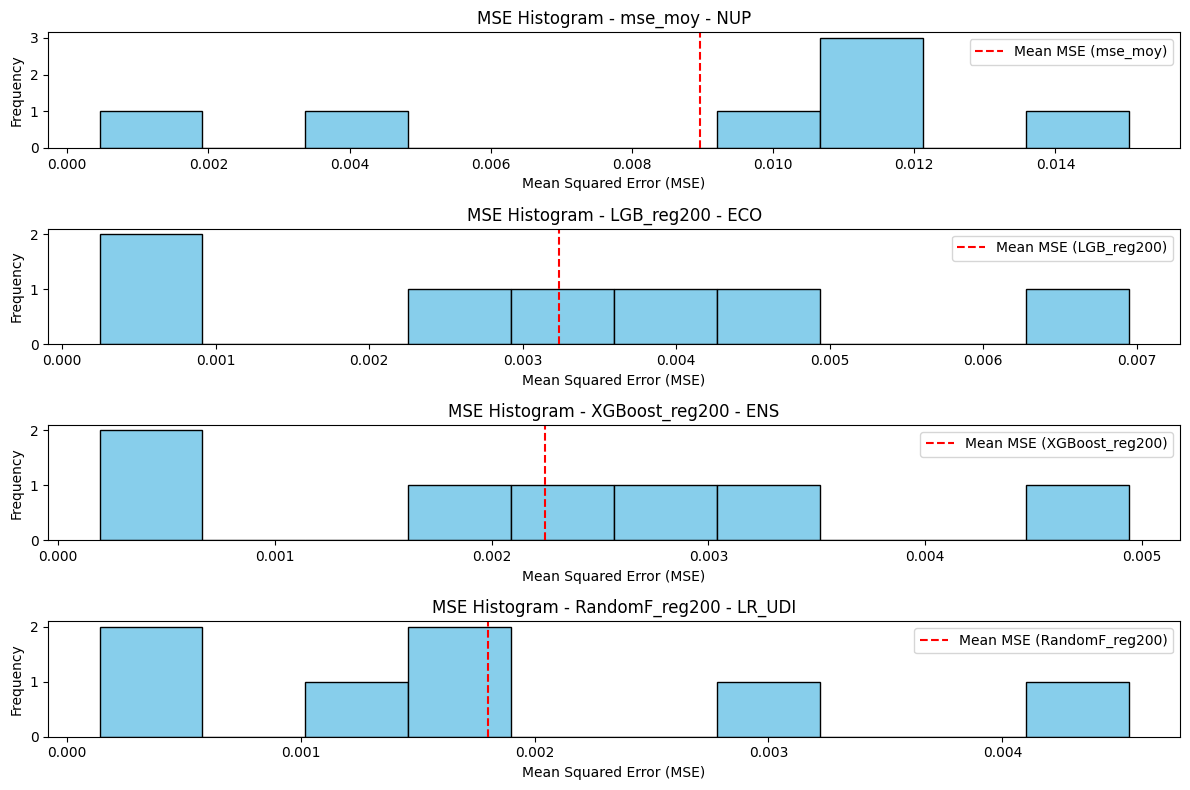

In [22]:

# Extract model names and MSE values
models = list(dico_perf.keys())
mse_values = list(dico_perf.values())

# Plotting histograms
fig, axs = plt.subplots(nrows=len(models), figsize=(12, 2 * len(models)))

for i, model in enumerate(models):
    axs[i].hist(mse_values[i], bins=10, color='skyblue', edgecolor='black')
    axs[i].axvline(x=dico_perf_moy[model], color='r', linestyle='--', label=f'Mean MSE ({model})')
    axs[i].set_title(f'MSE Histogram - {model} - {titr_part[i]}')
    axs[i].set_xlabel('Mean Squared Error (MSE)')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

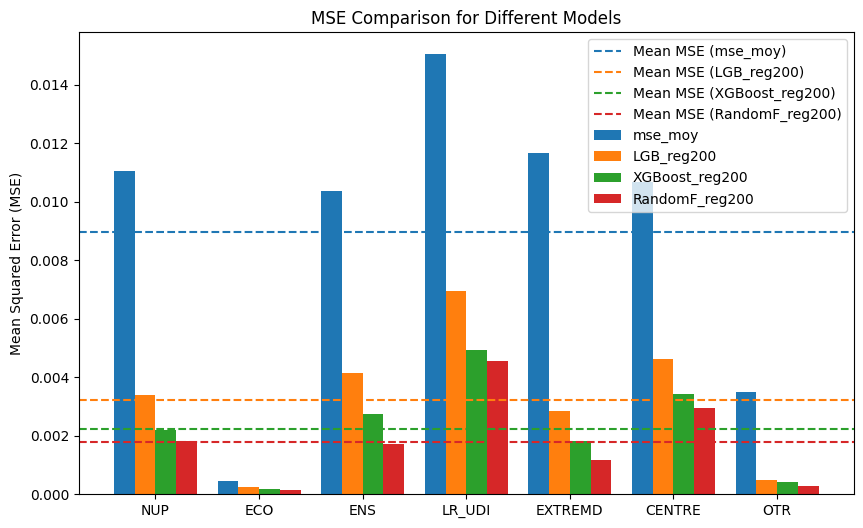

In [23]:
models = list(dico_perf.keys())
mse_values = list(dico_perf.values())

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    ax.bar([j + i * 0.2 for j in range(len(mse_values[0]))], mse_values[i], width=0.2, label=model)

    # Add a line for the mean MSE
    ax.axhline(y=dico_perf_moy[model], color=f'C{i}', linestyle='--', label=f'Mean MSE ({model})')

ax.set_xticks([j + 0.3 for j in range(len(mse_values[0]))])
ax.set_xticklabels(titr_part)
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('MSE Comparison for Different Models')

# Show legend
ax.legend()

# Show the plot
plt.show()

In [24]:
dico_perf_moy

{'mse_moy': 0.008965541336690854,
 'LGB_reg200': 0.0032371278894157947,
 'XGBoost_reg200': 0.0022446240073188766,
 'RandomF_reg200': 0.0018012712406959045}

## TEST STREAMLIT

In [29]:
titr_part = ['NUP', 'ECO', 'ENS', 'LR_UDI', 'EXTREMD', 'CENTRE', 'OTR']

dico_perf_st = {'mse_moy': [0.011047658221418547, 0.00045765054495667303, 0.010372182986578304, 0.015036222494032608, 0.011667350420367715, 0.010671522614056612, 0.0035062020754255247], 'LGB_reg200': [0.0033958852315906503, 0.0002443474564698635, 0.004143222765996065, 0.006946201984190602, 0.0028293664323298167, 0.004622804941894148, 0.00047806641343941587], 'XGBoost_reg200': [0.002190349018291624, 0.00019058591708881516, 0.002737929451386264, 0.004938271011016184, 0.0018107279166872854, 0.003415542751482656, 0.0004289619852793093], 'RandomF_reg200': [0.0018771754150696829, 0.00014310619048045286, 0.0017846895966924503, 0.004673477002255421, 0.0011821959903784592, 0.0029879500168552217, 0.00029222167578787223]}

dico_perf_moy_st = {'mse_moy': 0.008965541336690854, 'LGB_reg200': 0.0032371278894157947, 'XGBoost_reg200': 0.0022446240073188766, 'RandomF_reg200': 0.0018486879839313658}

In [34]:
dico_perf_st.keys()

dict_keys(['mse_moy', 'LGB_reg200', 'XGBoost_reg200', 'RandomF_reg200'])

In [43]:
tab_perf = []

for i, p in enumerate(titr_part):
    tab_perf.append([
        p,
        dico_perf_st['mse_moy'][i],
        dico_perf_st['RandomF_reg200'][i],
        dico_perf_st['mse_moy'][i] / dico_perf_st['RandomF_reg200'][i],
        dico_perf_st['XGBoost_reg200'][i],
        dico_perf_st['mse_moy'][i] / dico_perf_st['XGBoost_reg200'][i],
        dico_perf_st['LGB_reg200'][i],
        dico_perf_st['mse_moy'][i] / dico_perf_st['LGB_reg200'][i]
    ])     


In [44]:
print(tab_perf)

[['NUP', 0.011047658221418547, 0.0018771754150696829, 5.885256184760147, 0.002190349018291624, 5.043788971145445, 0.0033958852315906503, 3.253248407409742], ['ECO', 0.00045765054495667303, 0.00014310619048045286, 3.197978671783485, 0.00019058591708881516, 2.4012820671498134, 0.0002443474564698635, 1.872949903258425], ['ENS', 0.010372182986578304, 0.0017846895966924503, 5.8117574091320865, 0.002737929451386264, 3.7883309890715693, 0.004143222765996065, 2.5034094405215366], ['LR_UDI', 0.015036222494032608, 0.004673477002255421, 3.2173524095178223, 0.004938271011016184, 3.0448354212415927, 0.006946201984190602, 2.164668192525168], ['EXTREMD', 0.011667350420367715, 0.0011821959903784592, 9.8692183997618, 0.0018107279166872854, 6.443458629451659, 0.0028293664323298167, 4.123661851307234], ['CENTRE', 0.010671522614056612, 0.0029879500168552217, 3.5715197891055253, 0.003415542751482656, 3.1244002463222573, 0.004622804941894148, 2.308451848648423], ['OTR', 0.0035062020754255247, 0.000292221675

## Features Importance
### Manque table RandomForest

## Features Importance
### Manque table RandomForest

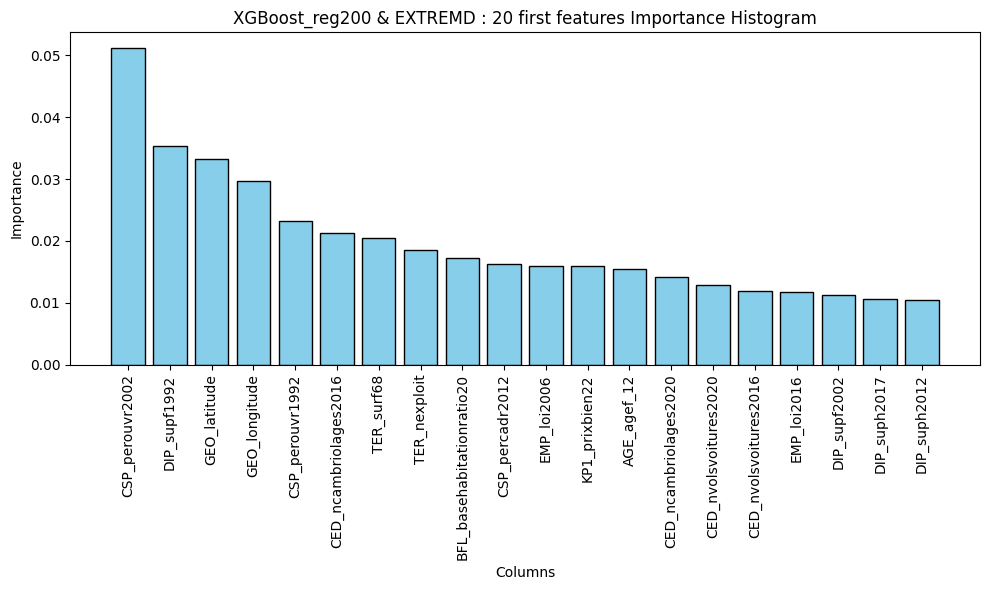

In [91]:
def importance_graf (db_path, model_tbl, cat='NUP', size = 10) :
    connection = sqlite3.connect(db_path)

    # Create a cursor object to execute SQL queries
    cursor = connection.cursor()

    # Define the SQL query for the join
    col_value = f"{cat}_import"
    col_indice_var = f"{cat}_estim_indice"

    # Use string formatting to insert variable values into the query
    sql_query = f"""
    SELECT 
        C.titr_col_value,
        FI.{col_value}
    FROM     
        {model_tbl} FI
        JOIN X_col_titr AS C ON C.indice = FI.{col_indice_var}
    ORDER BY 
        FI.{col_value} DESC
    LIMIT {size}
    """

    # print (sql_query )
    # Execute the SQL query and fetch the result into a DataFrame
    imp_df = pd.read_sql_query(sql_query, connection)   
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(imp_df['titr_col_value'], imp_df[col_value], color='skyblue', edgecolor='black')
    plt.xticks(rotation='vertical')
    plt.xlabel('Columns')
    plt.ylabel('Importance')
    plt.title(f'{model_tbl[0:-15]} & {cat} : {size} first features Importance Histogram')
    plt.tight_layout()
    plt.show()
        
model_tbl='XGBoost_reg200_importance_tbl'    
importance_graf (db_path, model_tbl, cat='EXTREMD',size = 20)

<h1>NUP</h1> LGB_reg200_importance_tbl


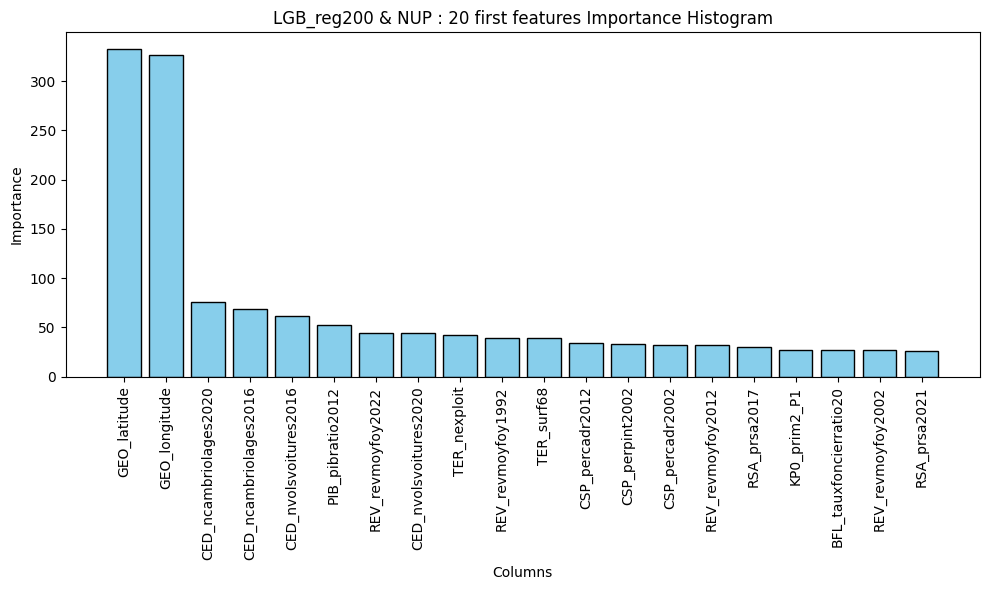

<h1>ECO</h1> LGB_reg200_importance_tbl


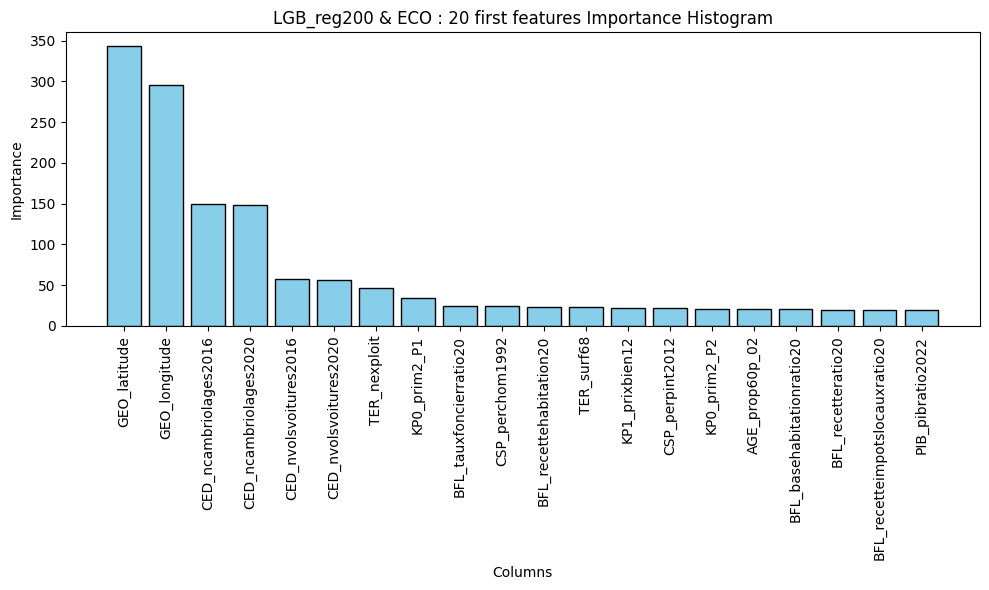

<h1>ENS</h1> LGB_reg200_importance_tbl


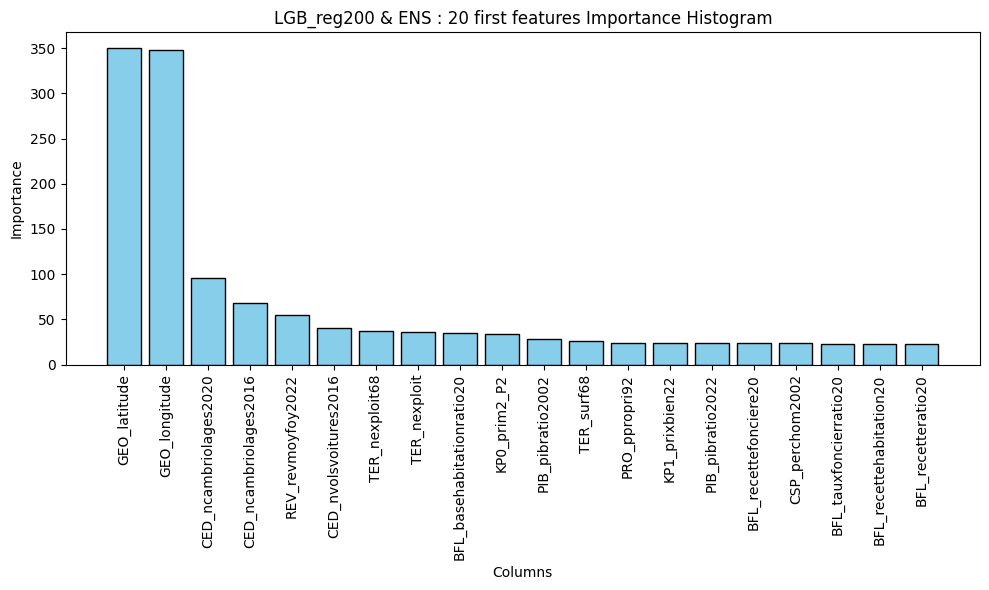

<h1>LR_UDI</h1> LGB_reg200_importance_tbl


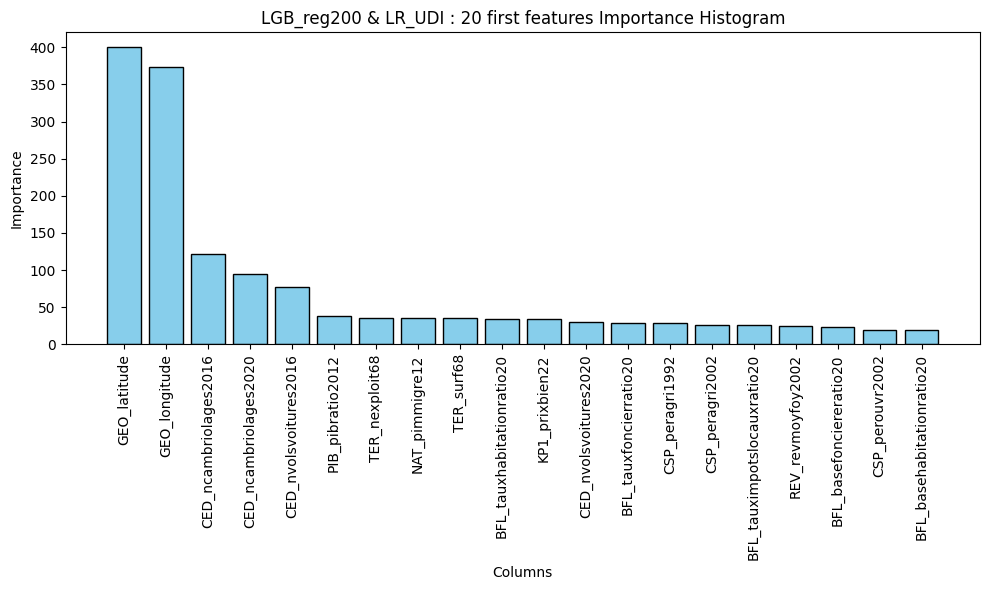

<h1>EXTREMD</h1> LGB_reg200_importance_tbl


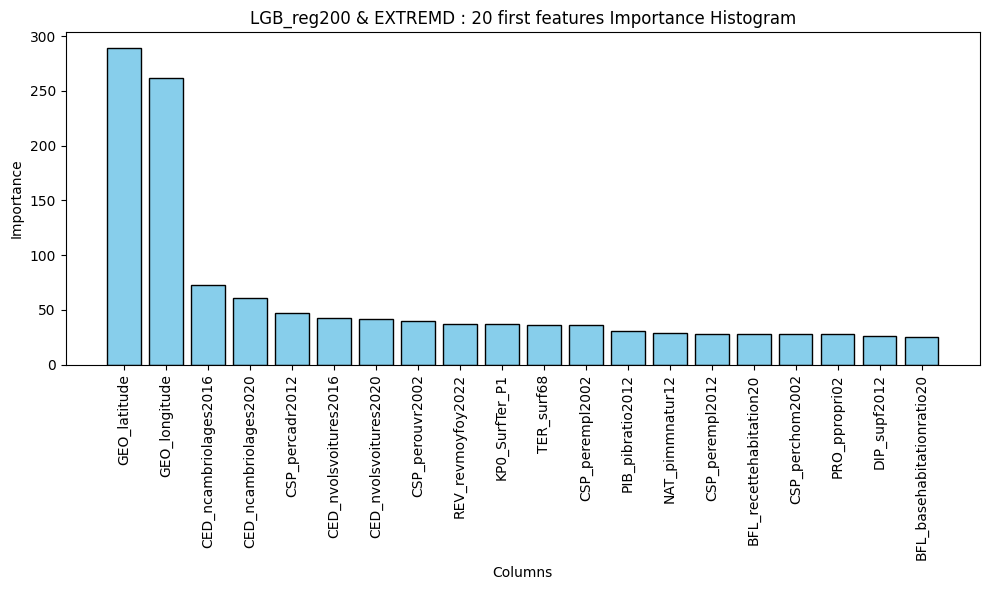

<h1>CENTRE</h1> LGB_reg200_importance_tbl


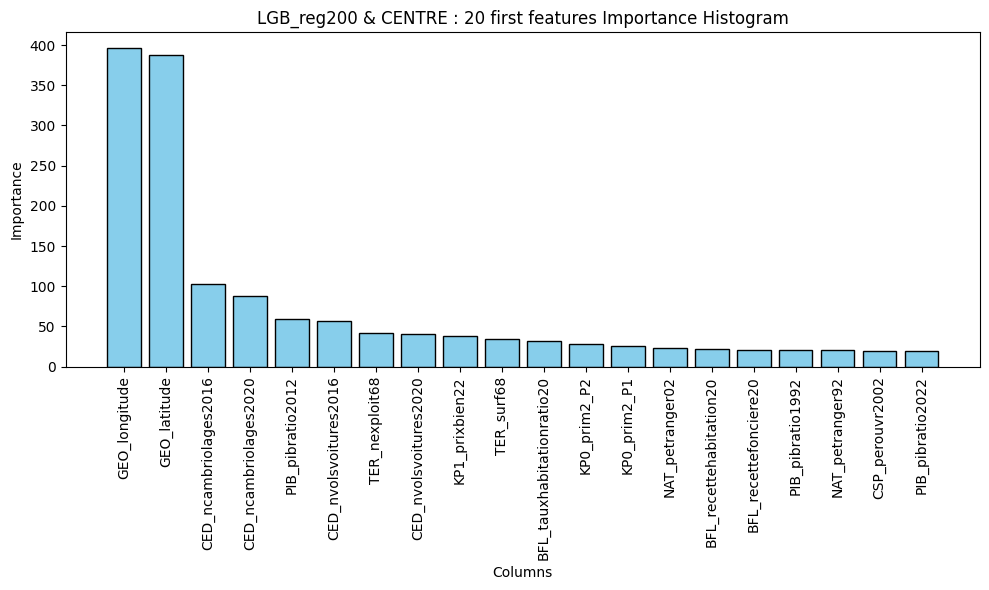

<h1>OTR</h1> LGB_reg200_importance_tbl


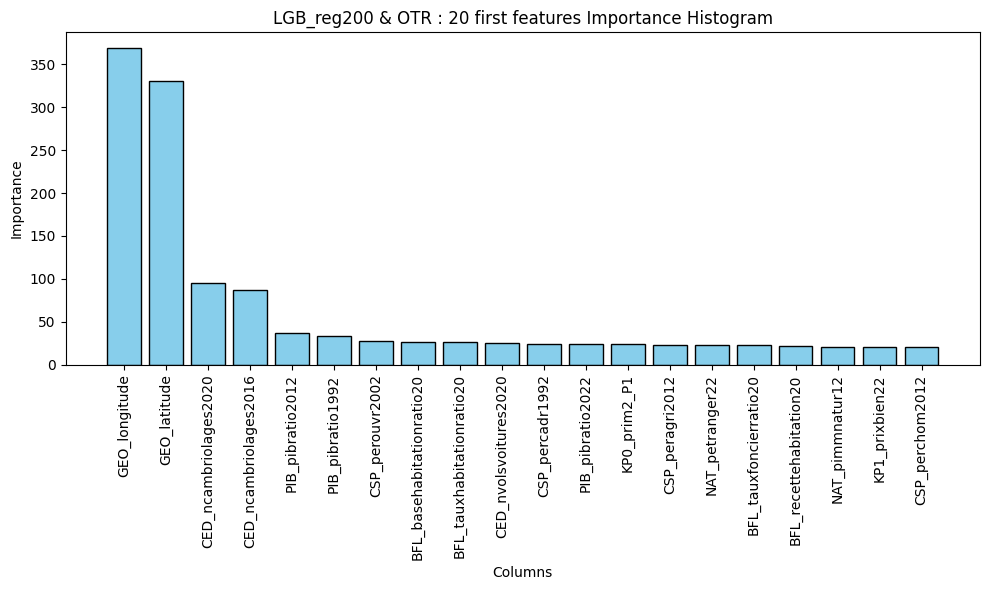

<h1>NUP</h1> XGBoost_reg200_importance_tbl


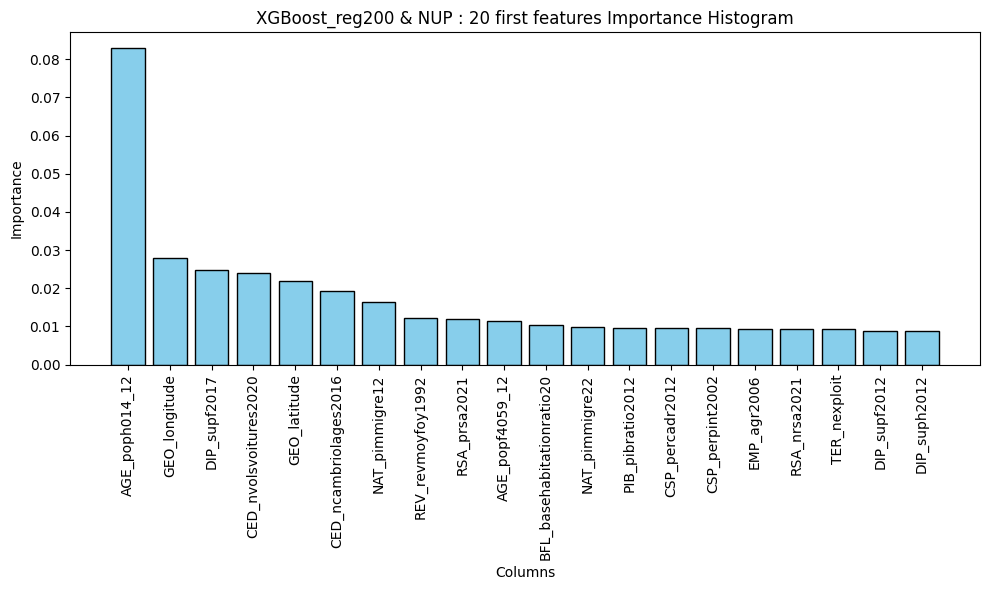

<h1>ECO</h1> XGBoost_reg200_importance_tbl


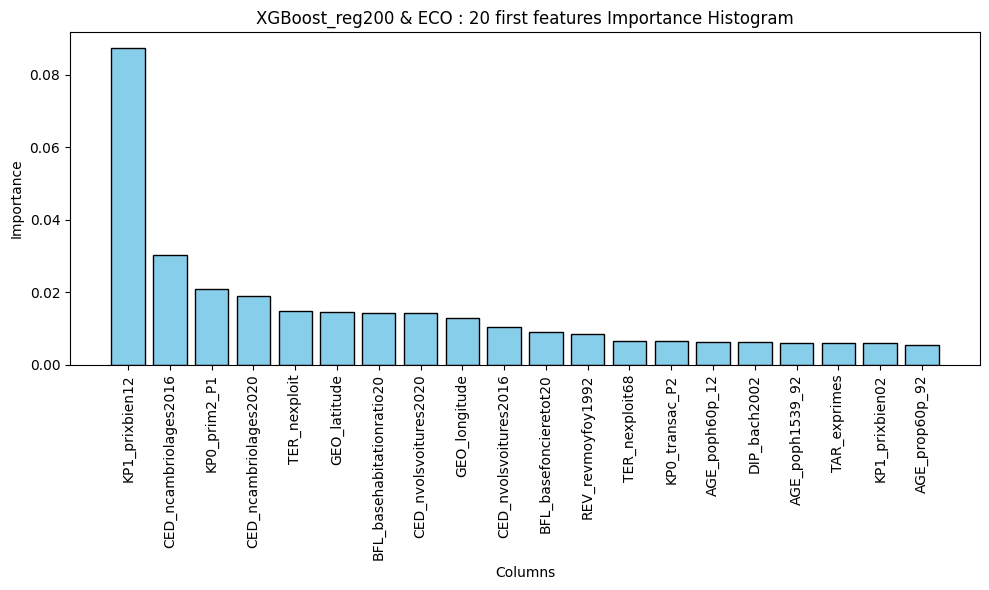

<h1>ENS</h1> XGBoost_reg200_importance_tbl


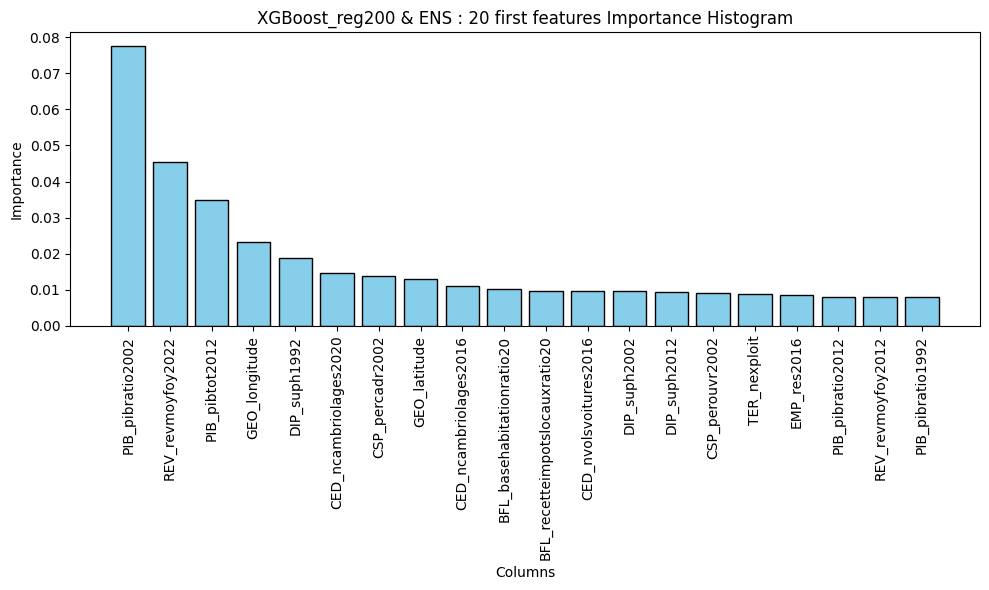

<h1>LR_UDI</h1> XGBoost_reg200_importance_tbl


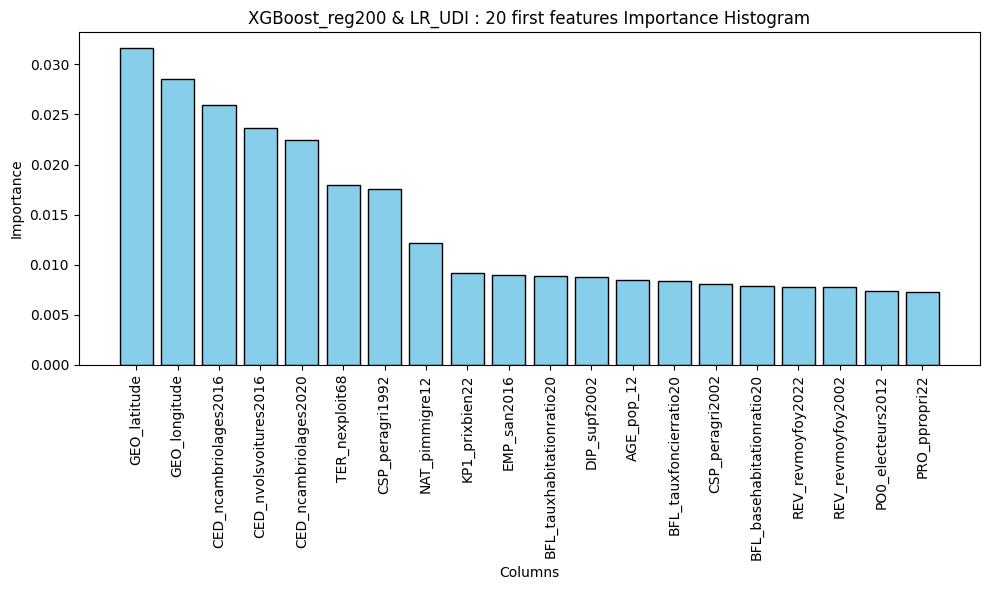

<h1>EXTREMD</h1> XGBoost_reg200_importance_tbl


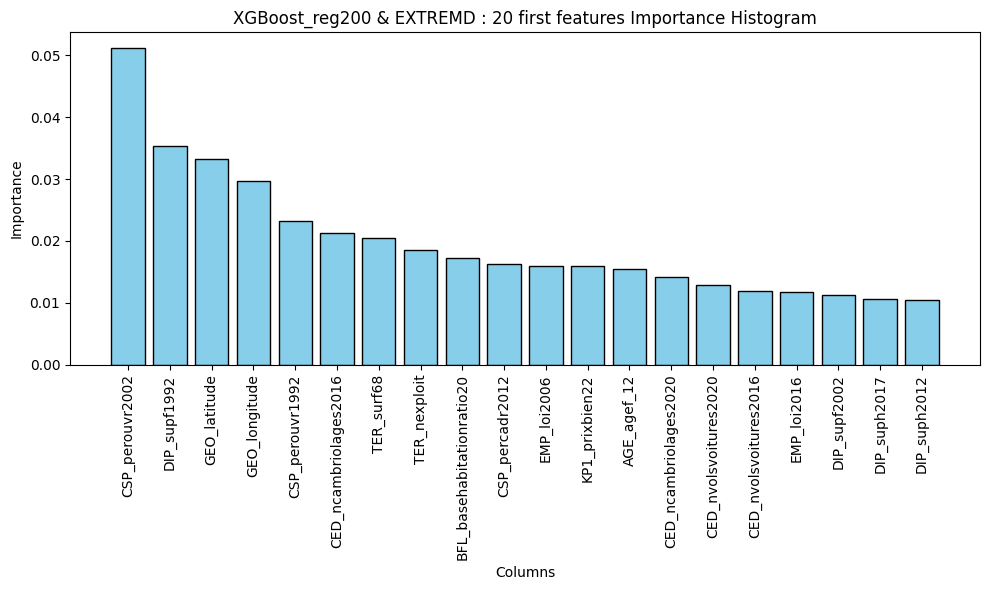

<h1>CENTRE</h1> XGBoost_reg200_importance_tbl


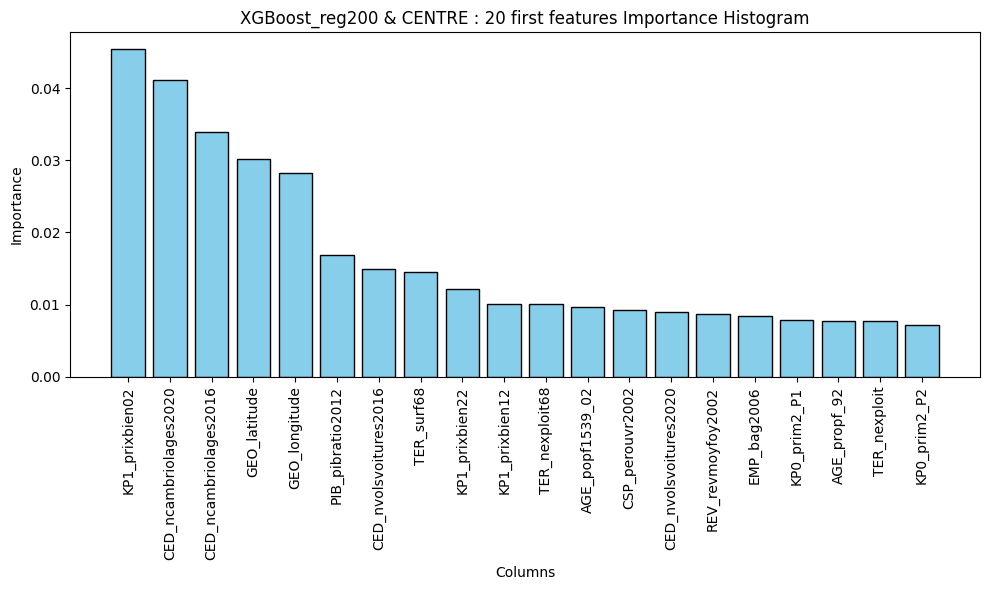

<h1>OTR</h1> XGBoost_reg200_importance_tbl


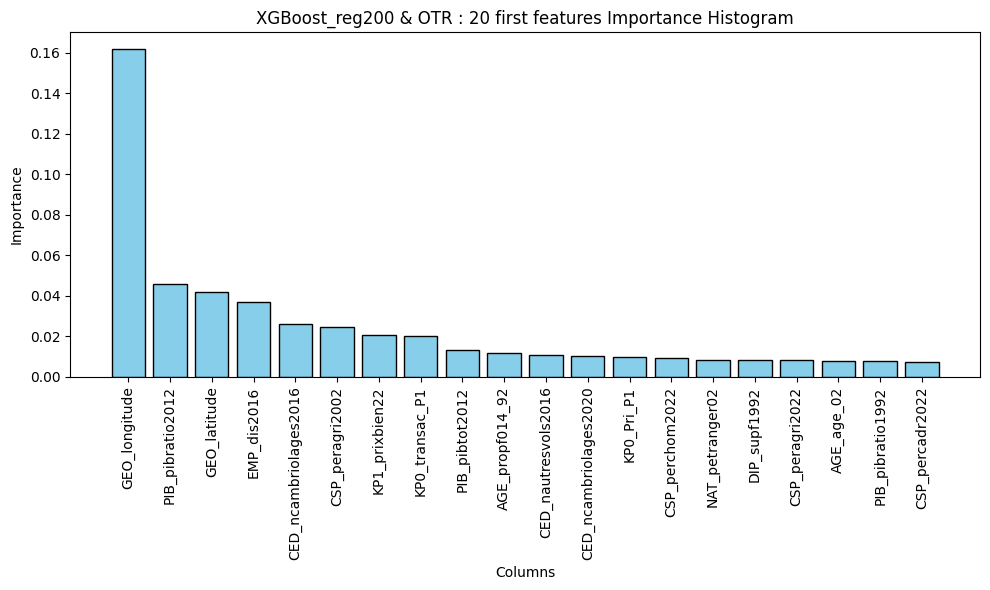

In [54]:
for model_tbl in ['LGB_reg200_importance_tbl','XGBoost_reg200_importance_tbl'] :
    for part in titr_part :
        print (f"<h1>{part}</h1> {model_tbl}")
        importance_graf (db_path, model_tbl, cat=part, size = 20)


        SELECT 
            SUBSTR(C.titr_col_value, 1, 3) AS col_value_prefix,
            AVG(FI.EXTREMD_import) AS avg_col_value
        FROM     
            XGBoost_reg200_importance_tbl FI
            JOIN X_col_titr AS C ON C.indice = FI.EXTREMD_estim_indice
        GROUP BY 
            col_value_prefix
    


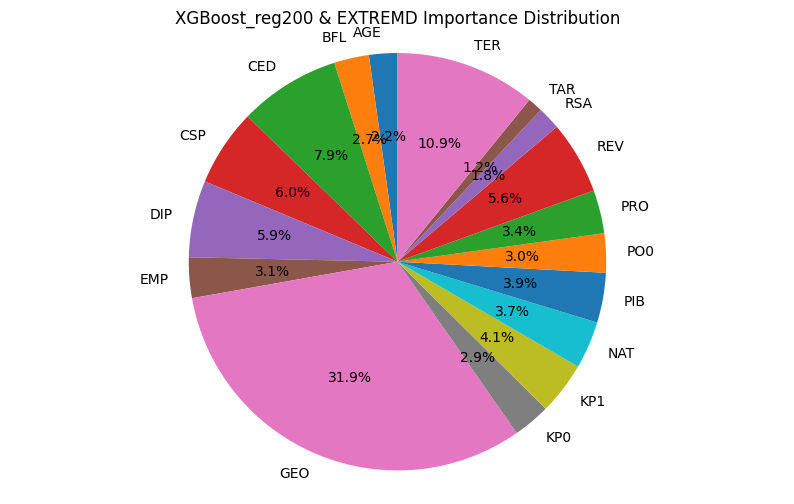

In [100]:
def importance_distrib_graf (db_path, model_tbl, cat='NUP') :
    connection = sqlite3.connect(db_path)

    # Create a cursor object to execute SQL queries
    cursor = connection.cursor()

    # Define the SQL query for the join
    col_value = f"{cat}_import"
    col_indice_var = f"{cat}_estim_indice"

    # Use string formatting to insert variable values into the query
    sql_query = f"""
        SELECT 
            SUBSTR(C.titr_col_value, 1, 3) AS col_value_prefix,
            AVG(FI.{col_value}) AS avg_col_value
        FROM     
            {model_tbl} FI
            JOIN X_col_titr AS C ON C.indice = FI.{col_indice_var}
        GROUP BY 
            col_value_prefix
    """

    print(sql_query)
    # Execute the SQL query and fetch the result into a DataFrame
    imp_df = pd.read_sql_query(sql_query, connection)   

    # Plotting Pie Chart
    plt.figure(figsize=(10, 6))
    plt.pie(imp_df['avg_col_value'], labels=imp_df['col_value_prefix'], autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'{model_tbl[0:-15]} & {cat} Importance Distribution')
    plt.show()

        
model_tbl='XGBoost_reg200_importance_tbl'    
importance_distrib_graf (db_path, model_tbl, cat='EXTREMD')